In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
code_path = os.path.abspath('../code')

# Add the path to sys.path
if code_path not in sys.path:
    sys.path.append(code_path)

In [3]:
from week4 import particle
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [4]:
from matplotlib.patches import FancyArrowPatch

def visualize_prm(G, particle, title='PRM Graph'):
    """
    Visualize the PRM graph.

    Parameters:
        G (networkx.DiGraph): The directed PRM graph.
        particle: An object containing ymax and vmax attributes to set plot limits.
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel('Position (y)')
    plt.ylabel('Velocity (v)')

    # Draw edges with arrows for directed graph
    for s1, s2 in G.edges():
        # Extract node positions
        pos1 = s1
        pos2 = s2
        
        # Add arrow between nodes
        arrow = FancyArrowPatch(
            pos1, pos2, color='b', arrowstyle='->', alpha=0.3, mutation_scale=10
        )
        plt.gca().add_patch(arrow)

    # Draw nodes
    y_vals = [s[0] for s in G.nodes]
    v_vals = [s[1] for s in G.nodes]
    plt.scatter(y_vals, v_vals, c='r', s=10)

    # Set limits
    plt.xlim(-particle.ymax - 0.25, particle.ymax + 0.25)
    plt.ylim(-particle.vmax - 0.25, particle.vmax + 0.25)
    plt.grid(True)
    plt.show()


In [5]:
def plot_trajectory(trajectory, force, title):
    y_vals = trajectory[:, 0]
    v_vals = trajectory[:, 1]

    plt.figure(figsize=(10, 6))

    plt.plot(y_vals, v_vals, color='blue', lw=2)

    for i in range(len(force)):
        x_pos = y_vals[i]
        y_pos = v_vals[i]

        if force[i] < 0:
            dy, dx = force[i]*2, 0
        elif force[i] > 0:
            dy, dx = force[i]*2, 0
        else:
            dx, dy = 0, 0

        # Plot the arrow at the trajectory point
        plt.quiver(x_pos, y_pos, dx, dy, scale=10, color='red', width=0.005)

    plt.xlim(-my_particle.ymax-0.5, my_particle.ymax+0.5)
    plt.ylim(-my_particle.vmax-0.5, my_particle.vmax+0.5)
    plt.gca().set_aspect('equal')
    plt.xlabel('Position (y)')
    plt.ylabel('Velocity (v)')
    plt.title(title)
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    print("Particle ends at:", trajectory[-1])

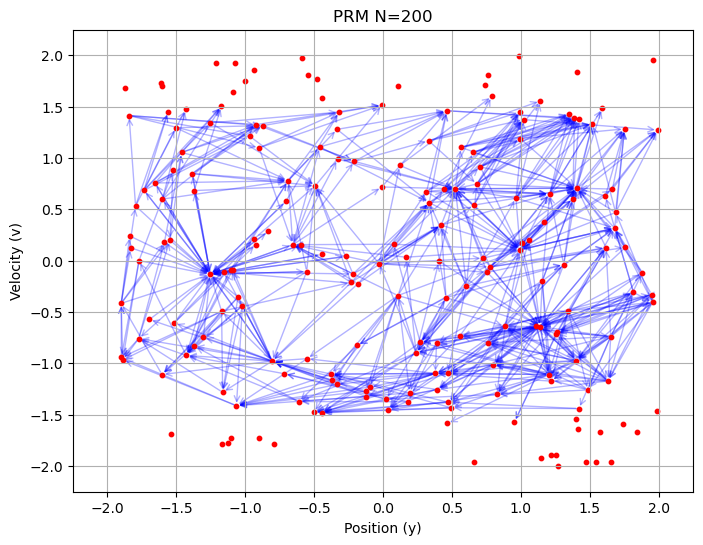

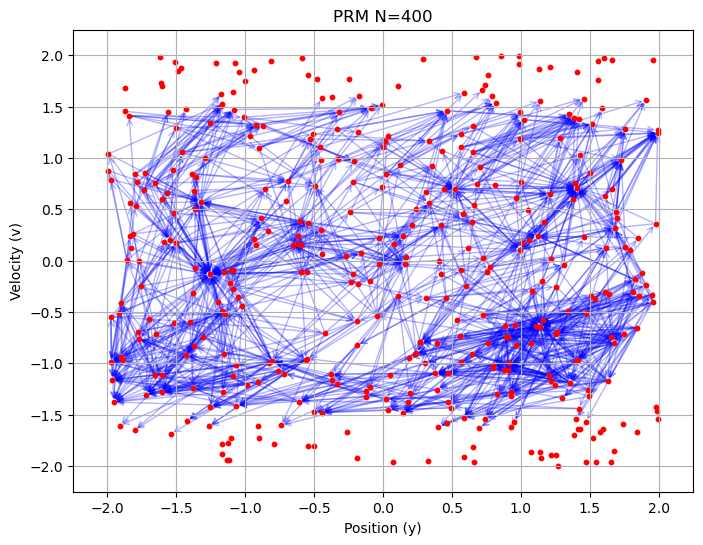

In [6]:
my_particle = particle(ymax=2, vmax=2, m=0.5)
G_200 = my_particle.build_prm(N=200, radius=1)
visualize_prm(G_200, my_particle, title="PRM N=200")

G_400 = my_particle.build_prm(G_200, N=200, radius=1)
visualize_prm(G_400, my_particle, title="PRM N=400")

# G_800 = my_particle.build_prm(G_400, N=400, radius=2)
# visualize_prm(G_800, my_particle, title="PRM N=800")

In [7]:
result = my_particle.find_path(G_200, (0.5, 0.5), (0, 0))
if result is not None:
    trajectory, force = result
    plot_trajectory(np.array(trajectory), force, "path from (0.5, 0.5) to (0, 0)")
else:
    print("no path found!")

no path found!


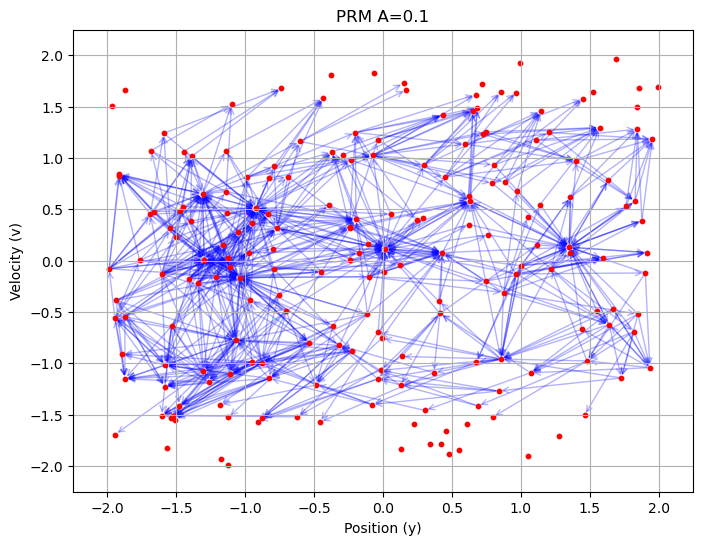

In [8]:
my_particle = particle(ymax=2, vmax=2, m=0.5, f_phi=lambda y: 0.1*np.cos(y))
G_1 = my_particle.build_prm(N=200, radius=1)
visualize_prm(G_1, my_particle, title="PRM A=0.1")

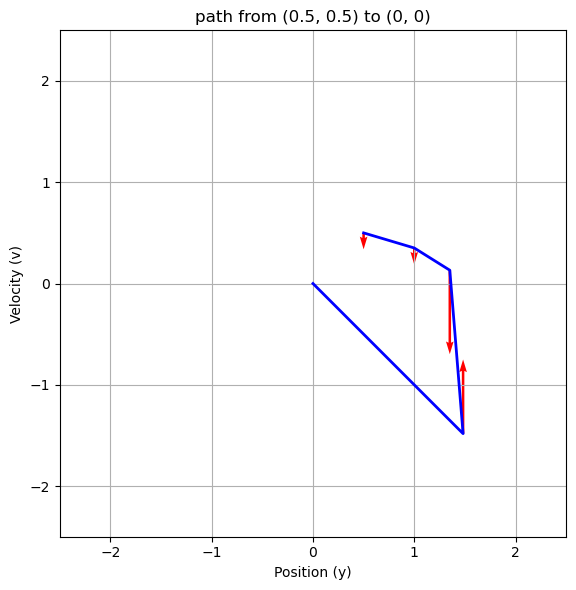

Particle ends at: [0. 0.]


In [9]:
result = my_particle.find_path(G_1, (0.5, 0.5), (0, 0))
if result is not None:
    trajectory, force = result
    plot_trajectory(np.array(trajectory), force, "path from (0.5, 0.5) to (0, 0)")
else:
    print("no path found!")

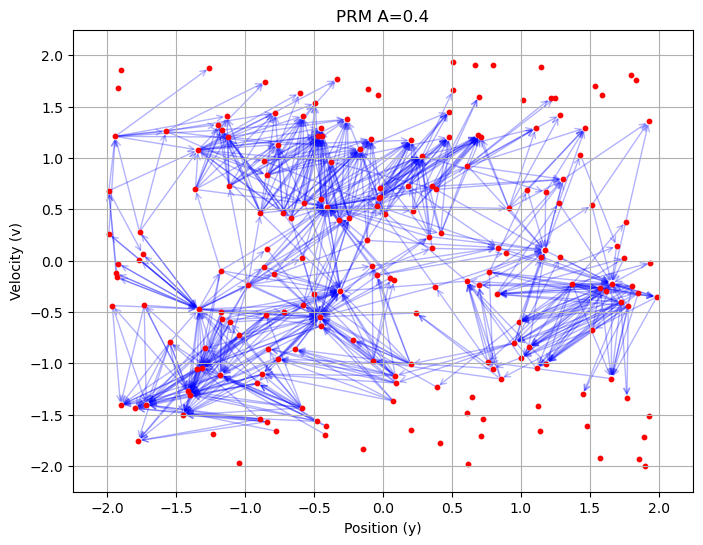

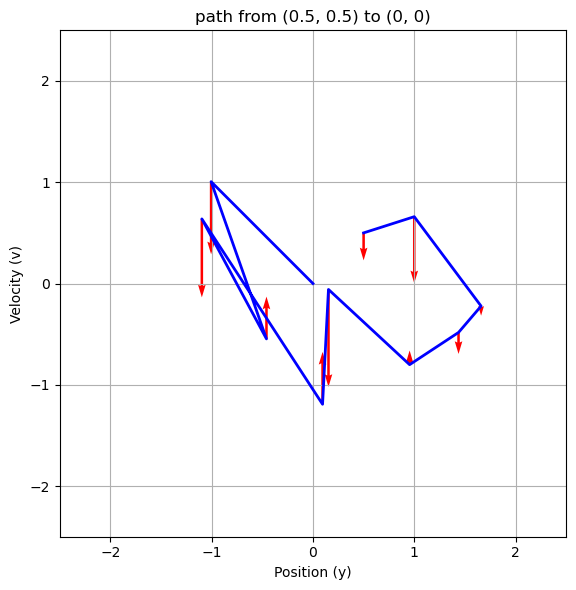

Particle ends at: [0. 0.]


In [12]:
my_particle = particle(ymax=2, vmax=2, m=0.5, f_phi=lambda y: 0.4*np.cos(y))
G_1 = my_particle.build_prm(N=200, radius=1)
visualize_prm(G_1, my_particle, title="PRM A=0.4")

result = my_particle.find_path(G_1, (0.5, 0.5), (0, 0))
if result is not None:
    trajectory, force = result
    plot_trajectory(np.array(trajectory), force, "path from (0.5, 0.5) to (0, 0)")
else:
    print("no path found!")

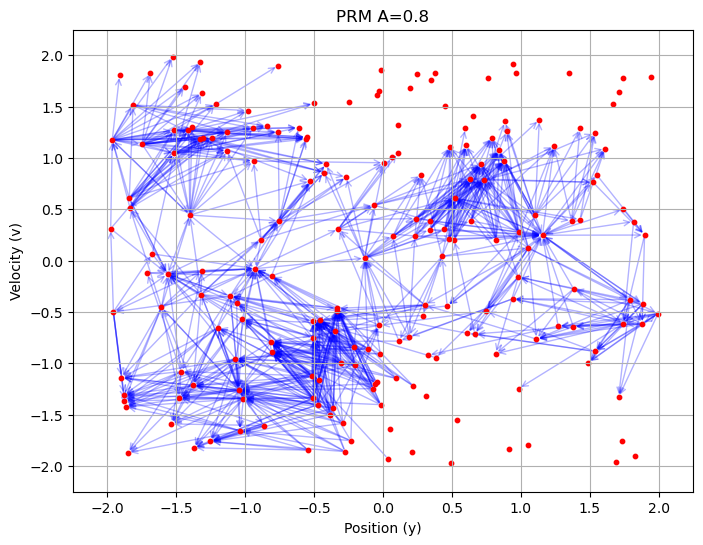

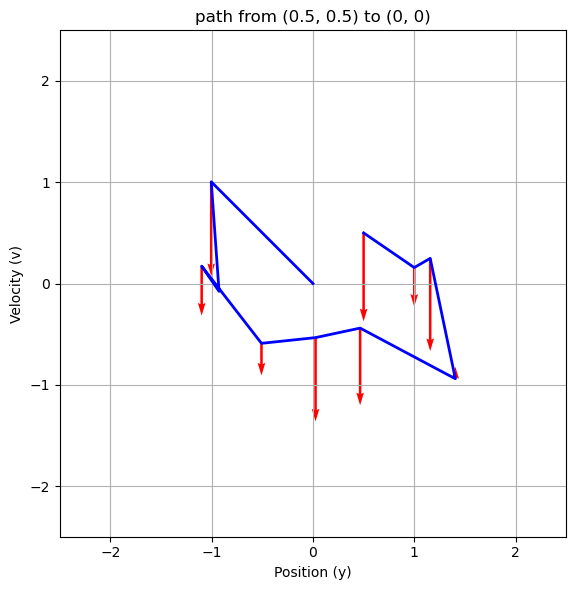

Particle ends at: [0. 0.]


In [14]:
my_particle = particle(ymax=2, vmax=2, m=0.5, f_phi=lambda y: 0.8*np.cos(y))
G_1 = my_particle.build_prm(N=200, radius=1)
visualize_prm(G_1, my_particle, title="PRM A=0.8")

result = my_particle.find_path(G_1, (0.5, 0.5), (0, 0))
if result is not None:
    trajectory, force = result
    plot_trajectory(np.array(trajectory), force, "path from (0.5, 0.5) to (0, 0)")
else:
    print("no path found!")